# Mapillary demo

<span style="color:red;">Note:</span> Please ensure that you have set up the `MAPILLARY_TOKEN` environment variable (cf. README.md).

In [1]:
# --------------------------------------
import warnings

warnings.filterwarnings("ignore")

# --------------------------------------
from PIL import Image

# --------------------------------------
import numpy as np

# --------------------------------------
from matplotlib import pyplot as plt

# --------------------------------------
import streetscapes as scs
import streetscapes.types as sst
import streetscapes.functions as ssf

from streetscapes.sources import SourceType
from streetscapes.streetview import SVWorkspace

# Setup

In [ ]:
# Image resolution (only used for Mapillary)
resolution = 2048  # Or 1024

# Coordinates
lat = 52.0
lon = 5.2

# Destination directory
image_dir = ssf.mkdir(scs.conf.IMAGE_DIR)

# Source map
source = sst.SourceMap.Mapillary

Choose a known image ID.

In [3]:
image_id = "160585752672295"

Download and display the image

In [ ]:
image_path = ssf.download_image(image_id, image_dir, source, resolution)

(-0.5, 2047.5, 1535.5, -0.5)

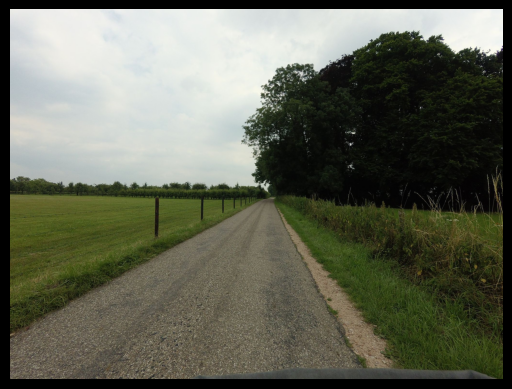

In [5]:
image = np.array(Image.open(image_path))
fig, ax = plt.subplots(1,1)
ax.imshow(image)
ax.axis('off')

In [ ]:
ws = SVWorkspace("./Amsterdam", create=True)

Now let's add which source of images we would like to use. Possible are sources are: [Mapillary](https://www.mapillary.com/), [Kartaview](https://kartaview.org/), [Google Streetview](https://developers.google.com/maps/documentation/streetview) and [Amsterdam Open Panorama](https://amsterdam.github.io/projects/open-panorama/). It is also possible to use [Global Streetscapes](https://ual.sg/project/global-streetscapes/) as a data source. 

In this example, we will use Global Streetscapes, Kartaview and Mapillary. 

<span style="color:red;">NOTE</span>: Make sure you have the appropriate API keys stored in your `.env` file. 

In [ ]:
kv = ws.add_source(SourceType.KartaView)
mp = ws.add_source(SourceType.Mapillary)

In [ ]:
kv, mp

In [ ]:
kv.show_contents()

To test that the connection to our data sources work, we can get the image URLs for a KartaView and a Mapillary image:

In [ ]:
kv_img_url = kv.get_image_url(1208524)
kv_img_url

In [ ]:
mp_img_url = mp.get_image_url("4911230068985425")
mp_img_url